<a href="https://colab.research.google.com/github/javmohir/Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv", index_col=0)
df.head()


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


Machine Learning.
Linear Regression

Ustunlar ta'rifi
- location - sotilayotgan uy manzili
- district - uy joylashgan tuman
- rooms - xonalar soni
- size - uy maydoni (kv.m)
- level - uy

In [2]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz

In [3]:
housing = df[df['district']=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [4]:
X=housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [5]:
Y=housing['price'].to_numpy()
Y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

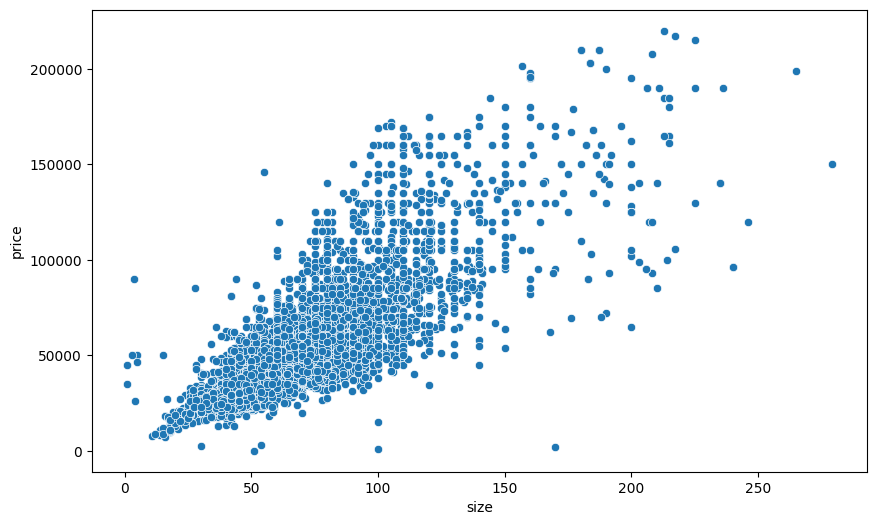

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size', y='price')
plt.show()

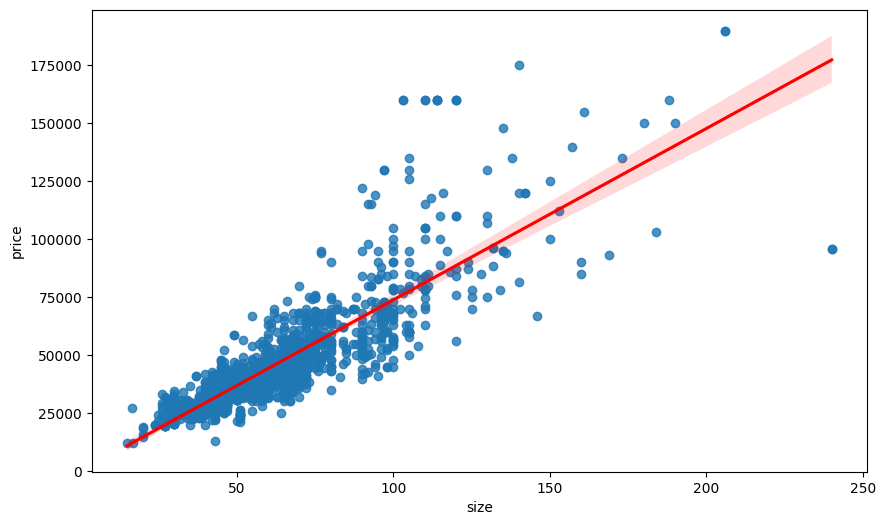

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={'color':'red'})
plt.show()

1-Vazifa
Sizning vazifangiz yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan xolda
�
0
θ
0
​
  va
�
1
θ
1
​
  koeffisientlarni hisoblash.



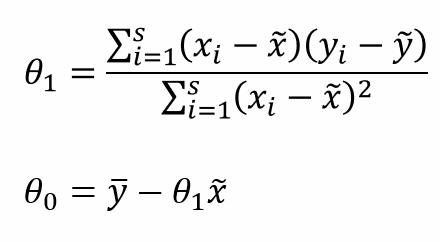

Bu yerda
�
~
x
~
  - X ustun uchun o'rtracha qiymat,
�
~
y
~
​
  - y ustun uchun o'rtracha qiymat

In [9]:
import numpy as np
Xmean=np.mean(X)
ymean=np.mean(Y)

In [10]:
Xmean

61.90783415841584

In [11]:
ymean

45617.487623762376

In [12]:
theta1=sum((X-Xmean)*(Y-ymean)/sum((X-Xmean)**2))
print(f"{theta1=}")

theta1=740.0264822713299


In [13]:
theta0=ymean-theta1*Xmean
print(f"{theta0=}")

theta0=-195.9491135269709


2-Vazifa
X dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi y ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

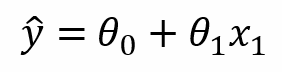

In [14]:
x_test=housing.sample(10, random_state=50)['size'].to_numpy()
print(f"{x_test=}")
y_test=housing.sample(10, random_state=50)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([ 52.,  76.,  42.,  36.,  47.,  44.,  26.,  50.,  91., 112.])
y_test=array([ 49000.,  68000.,  27000.,  27500.,  26000.,  33000.,  26100.,
        36500.,  49000., 118000.])


In [15]:
y_predict = theta0+theta1*x_test
print(f"{y_predict=}")

y_predict=array([38285.42796458, 56046.06353909, 30885.16314187, 26445.00424824,
       34585.29555323, 32365.21610641, 19044.73942553, 36805.37500004,
       67146.46077316, 82687.01690086])


In [16]:
pd.DataFrame({'asl qiymat':y_test, 'prignoz':y_predict})

,asl qiymat,prignoz
0,49000.0,38285.427965
1,68000.0,56046.063539
2,27000.0,30885.163142
3,27500.0,26445.004248
4,26000.0,34585.295553
5,33000.0,32365.216106
6,26100.0,19044.739426
7,36500.0,36805.375000
8,49000.0,67146.460773
9,118000.0,82687.016901


3-Vazifa
Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

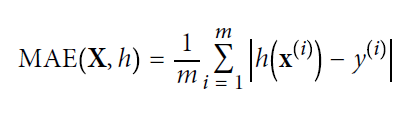

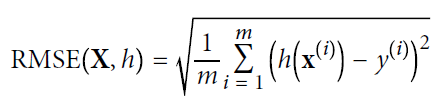

In [17]:
MEA=np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MEA=}")

MEA=9764.882628357967


In [18]:
RMSE=np.sqrt(sum(y_predict-y_test)**2/len(y_test))
print(f"{RMSE=}")

RMSE=11322.293990173284
